# TRABALHO 3: REMOÇÃO DE RUÍDO
### Aluno: Kawan Oliveira


## 1. Implemente uma função para contaminar uma imagem com ruído salt and pepper de acordo com uma probabilidade 𝑝 de um pixel específico ser contaminado por ruído, e uma chance igual de o ruído ser um pixel branco (255) ou preto (0)


In [ ]:
import cv2
import numpy as np
import random

def ruidoSaltAndPepper(imagem, p):
    # Criando uma cópia da imagem original para trabalhar, para não alterar a original
    imagem_ruidosa = imagem.copy()

    for i in range(imagem.shape[0]):  # Itera sobre as linhas
        for j in range(imagem.shape[1]):  # Itera sobre as colunas
            if random.random() < p:  # Com probabilidade p
                # Se o ruído for 'sal' (255) ou 'pimenta' (0)
                imagem_ruidosa[i, j] = 255 if random.random() < 0.5 else 0

    return imagem_ruidosa

# Carregando a imagem da Lenna para o experimento
imagem = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

# Probabilidade p de adicionar ruído: 2% de chance de um pixel ser contaminado
p = 0.02

# Adicionando o ruído S&P
imagem_com_ruido = ruidoSaltAndPepper(imagem, p)

# Mostrar os resultados
cv2.imshow('Imagem Original', imagem)
cv2.imshow('Imagem com Ruído', imagem_com_ruido)
cv2.waitKey(0)
cv2.destroyAllWindows()


Para implementar a função que adiciona o ruído salt and pepper, precisamos dar de entradas para a função:

- A imagem original.
- A probabilidade 𝑝 de um pixel ser contaminado.

Para cada pixel da imagem, com a nossa probabilidade 𝑝, decidimos se ele será contaminado com ruído; Se o pixel for contaminado, ele terá valor 0 (pimenta) ou 255 (sal), com uma probabilidade de 50% para cada uma das opções de contaminação.

Sendo assim, nosso código percorre a imagem pixel por pixel, gerando um número aleatório para decidir se o pixel será ou não contaminado. Caso o pixel seja selecionado para ser contaminado, escolhe entre sal e pimenta para contaminar (0 ou 255).

O código começa fazendo uma cópia da imagem para evitar modificar a imagem original (para que possamos mostrar ambas ao final, original e ruídosa). Logo após, chamamos a função e guardamos o resultado da execução (o retorno) na variável "imagem_com_ruido"; Após isso, exibimos ambas as imagens, orignal e ruídosa.

## 2. Contamine uma imagem com ruido salt and pepper

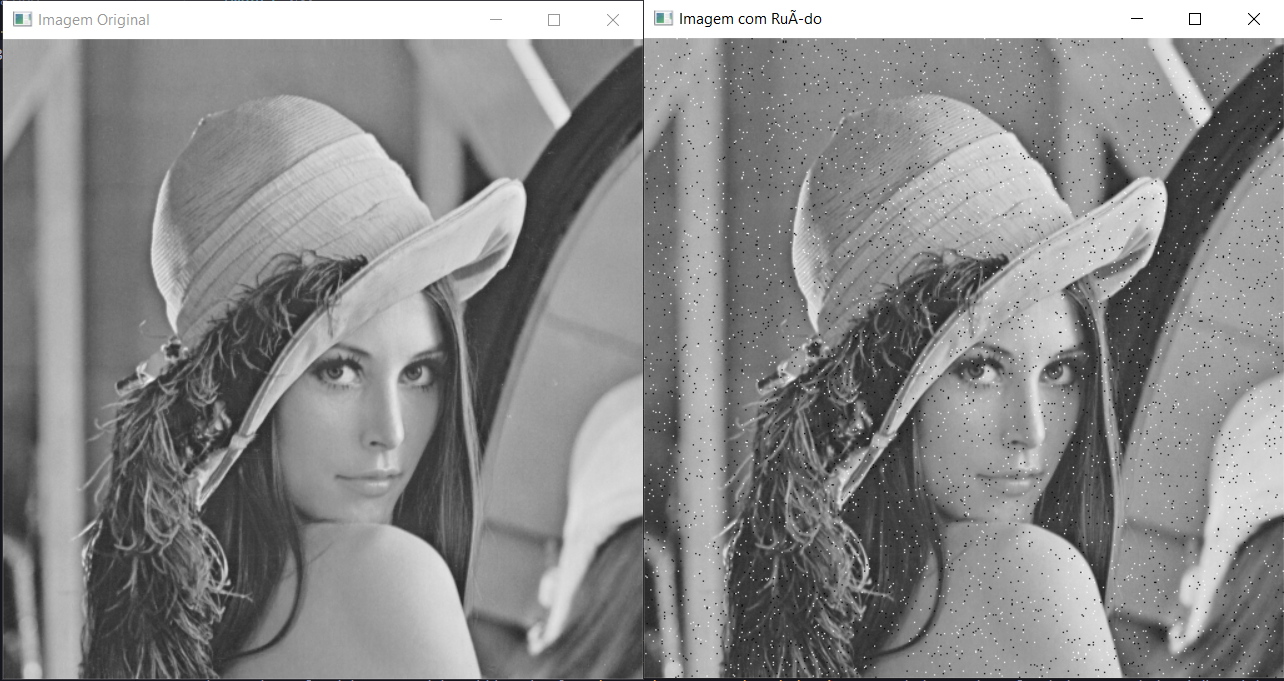

## 3. Implemente e utilize o filtro da mediana e filtre a imagem ruidosa. Varie o tamanho da janela. O que acontece se aumentarmos muito o seu tamanho?


In [ ]:
import cv2
import numpy as np
import random

def ruidoSaltAndPepper(imagem, p):
    # Criando uma cópia da imagem original para trabalhar, para não alterar a original
    imagem_ruidosa = imagem.copy()

    for i in range(imagem.shape[0]):  # Itera sobre as linhas
        for j in range(imagem.shape[1]):  # Itera sobre as colunas
            if random.random() < p:  # Com probabilidade p
                imagem_ruidosa[i, j] = 255 if random.random() < 0.5 else 0

    return imagem_ruidosa

# Carregando a imagem da Lenna para o experimento
imagem = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

# Probabilidade p de adicionar ruído: 2% de chance de um pixel ser contaminado
p = 0.02

# Adicionando o ruído S&P
imagem_com_ruido = ruidoSaltAndPepper(imagem, p)

# Aplicando o filtro de mediana com diferentes tamanhos de janela (kernel)
kernels = [3, 5, 7, 9]

# Exibindo a imagem original e a com ruído
cv2.imshow('Imagem Original', imagem)
cv2.imshow('Imagem com Ruído', imagem_com_ruido)

# Exibindo as imagens com o filtro de mediana
for k in kernels:
    imagem_filtrada = cv2.medianBlur(imagem_com_ruido, k)
    cv2.imshow(f'Filtro Mediana (Kernel {k}x{k})', imagem_filtrada)

cv2.waitKey(0)
cv2.destroyAllWindows()


O filtro da mediana funciona para "amenizar" o ruído gerado pelo Salt and Pepper; O filtro substitui cada pixel da imagem pela mediana dos pixels na sua vizinhança.

A função de filtro da mediana pode ser aplicada diretamente usando o OpenCV com cv2.medianBlur().

A função cv2.medianBlur(imagem, k) aplica o filtro da mediana, onde k é o tamanho da janela (kernel). Variações do tamanho de kernel são testadas, como 3x3, 5x5, 7x7 e 9x9.

### O que acontece ao aumentar o tamanho da janela?
1. Pequenas janelas (por exemplo, 3x3):

- O filtro da mediana remove parte do ruído, mas ainda não elimina completamente os pequenos detalhes; As bordas e texturas da imagem podem ser preservadas, mas a redução de ruído pode não ser ideal.

2. Janelas maiores (por exemplo, 9x9 ou 11x11):

- O filtro da mediana será mais eficaz na remoção do ruído, pois considera uma área maior para calcular a mediana. No entanto, com o kernel sendo muito grande, o filtro começa aos poucos (conforme o kernel aumenta), a apagar detalhes importantes da imagem, como bordas e pequenos objetos, já que ele suaviza uma área maior.


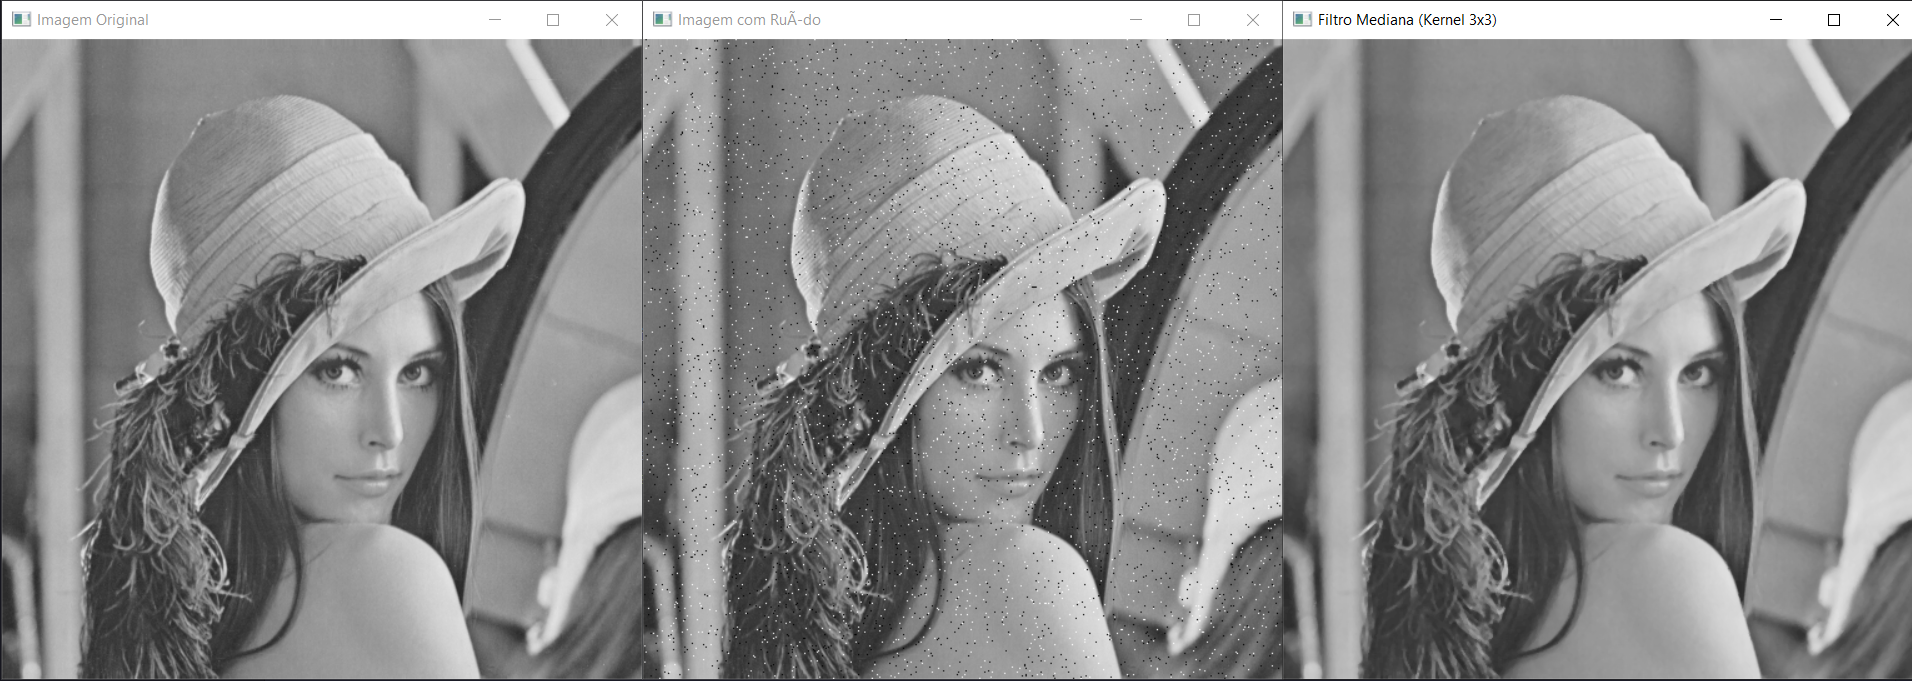

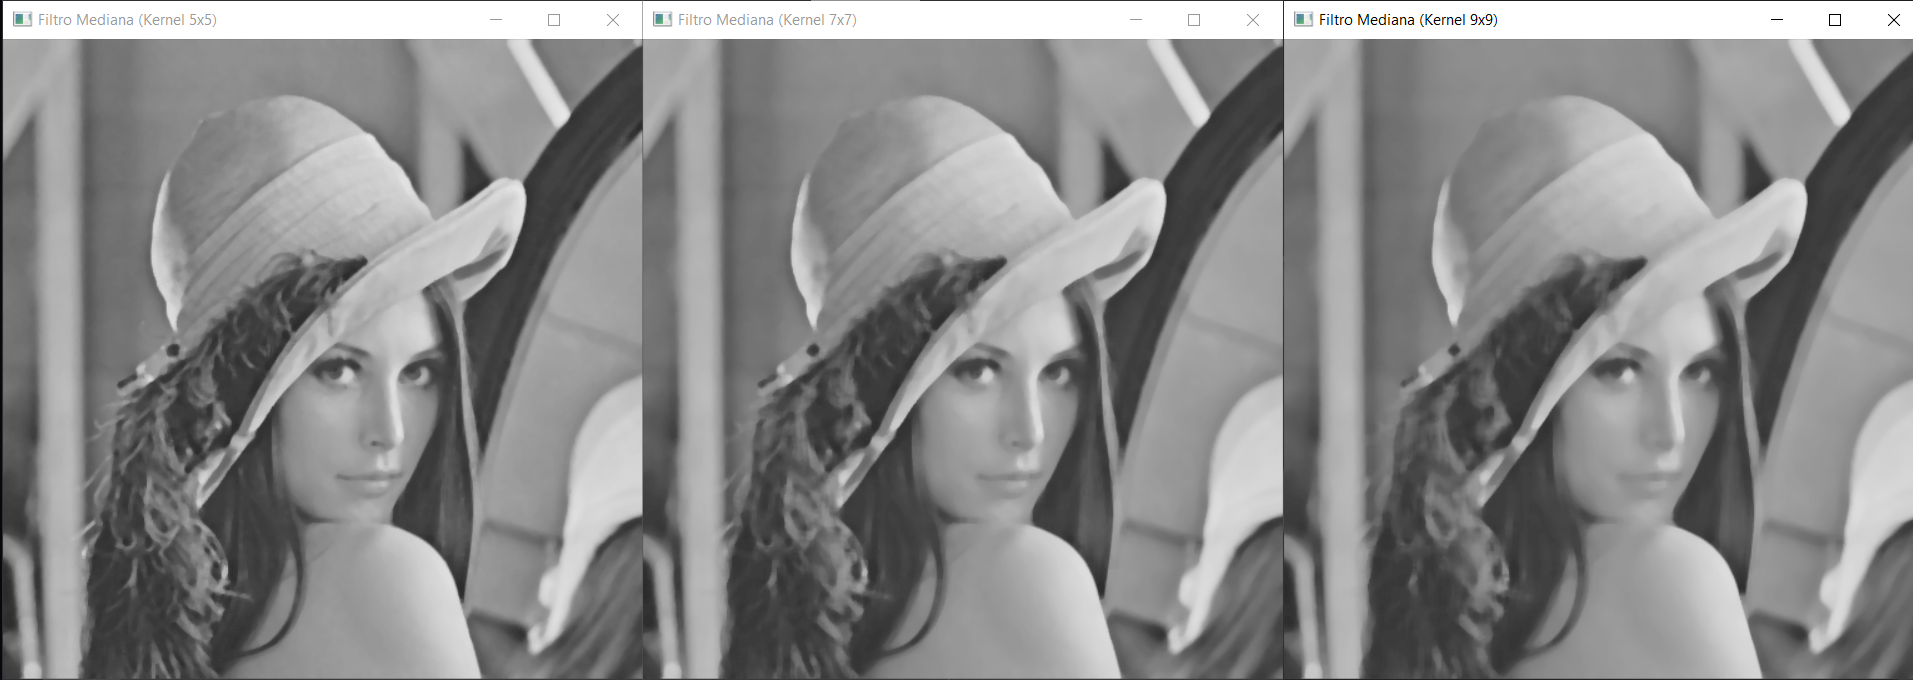

## 4. Utilize o filtro gaussiano para filtrar a imagem ruidosa. Também varie o tamanho da janela

In [ ]:
import cv2
import numpy as np
import random

def ruidoSaltAndPepper(imagem, p):
    # Criando uma cópia da imagem original para trabalhar, para não alterar a original
    imagem_ruidosa = imagem.copy()

    for i in range(imagem.shape[0]):  # Itera sobre as linhas
        for j in range(imagem.shape[1]):  # Itera sobre as colunas
            if random.random() < p:  # Com probabilidade p
                imagem_ruidosa[i, j] = 255 if random.random() < 0.5 else 0

    return imagem_ruidosa

# Carregando a imagem da Lenna para o experimento
imagem = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

# Probabilidade p de adicionar ruído: 2% de chance de um pixel ser contaminado
p = 0.02

# Adicionando o ruído S&P
imagem_com_ruido = ruidoSaltAndPepper(imagem, p)

# Aplicar filtro gaussiano com diferentes tamanhos de janela (kernel)
kernels = [3, 5, 7, 9]

# Exibindo a imagem original e a com ruído
cv2.imshow('Imagem Original', imagem)
cv2.imshow('Imagem com Ruído', imagem_com_ruido)

#Exibindo a sequencia de imagens com o filtro gaussiano
for k in kernels:
    imagem_filtrada = cv2.GaussianBlur(imagem_com_ruido, (k, k), 0)
    cv2.imshow(f'Filtro Gaussiano (Kernel {k}x{k})', imagem_filtrada)

cv2.waitKey(0)
cv2.destroyAllWindows()


Pesquisando um pouco pra entender melhor o filtro gaussiano e como ele funciona, cheguei no seguinte apontamento:
- O filtro gaussiano aplica uma convolução com uma função gaussiana, o que significa que ele suaviza a imagem de forma mais suave do que o filtro de média ou da mediana. O filtro gaussiano é eficaz na remoção de ruídos, preservando as bordas, especialmente quando comparado ao filtro de média.

O filtro gaussiano utiliza uma matriz de pesos baseada na função gaussiana. Quanto maior o tamanho da janela (ou o kernel), maior será a área da imagem considerada na média, resultando em maior suavização.

O filtro gaussiano é aplicado com cv2.GaussianBlur(imagem, (k, k), 0), onde (k, k) é o tamanho do kernel (a janela do filtro) e o terceiro parâmetro, 0, representa o desvio padrão da distribuição gaussiana. Aqui, estamos usando um desvio padrão automático.

### Efeito do tamanho do kernel no filtro gaussiano:
1. Pequenos kernels (3x3, 5x5):
- O filtro gaussiano com um kernel pequeno suaviza um pouco a imagem e reduz o ruído, mas preserva mais detalhes; Funcionam bem para ruídos não muito fortes, sem afetar muito os detalhes finos da imagem.

2. Kernels maiores (7x7, 9x9):
- Com kernels maiores, o efeito se mostrou mais intenso: o filtro considera uma área maior ao calcular a média ponderada, resultando em uma imagem mais suave e com menos ruído. No entanto, com um kernel grande, detalhes importantes podem ser suavizados também, como bordas e texturas finas, o que faz a imagem perder qualidade visual.

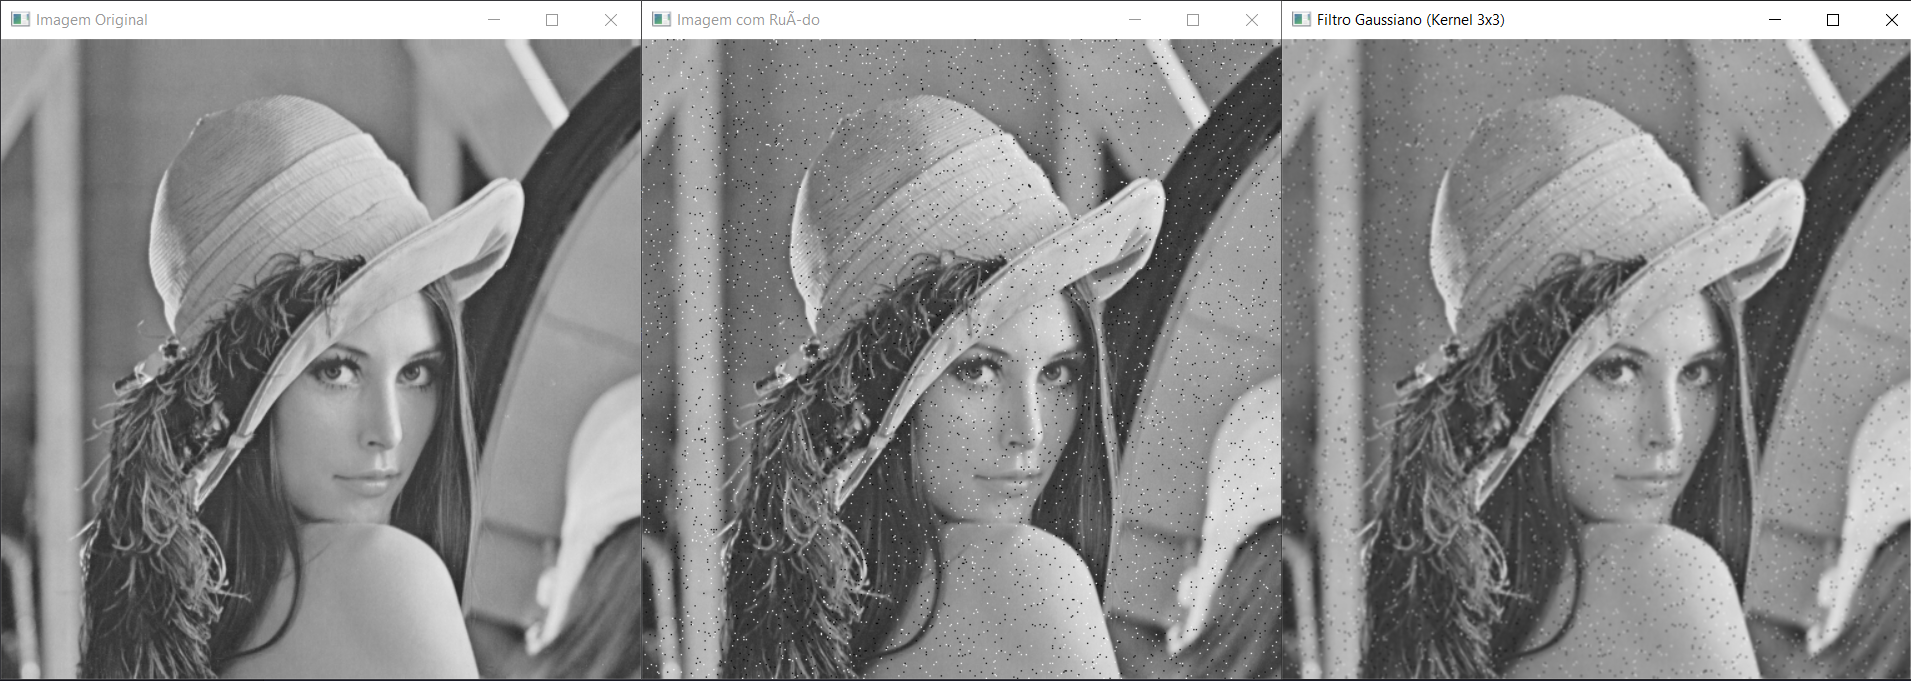

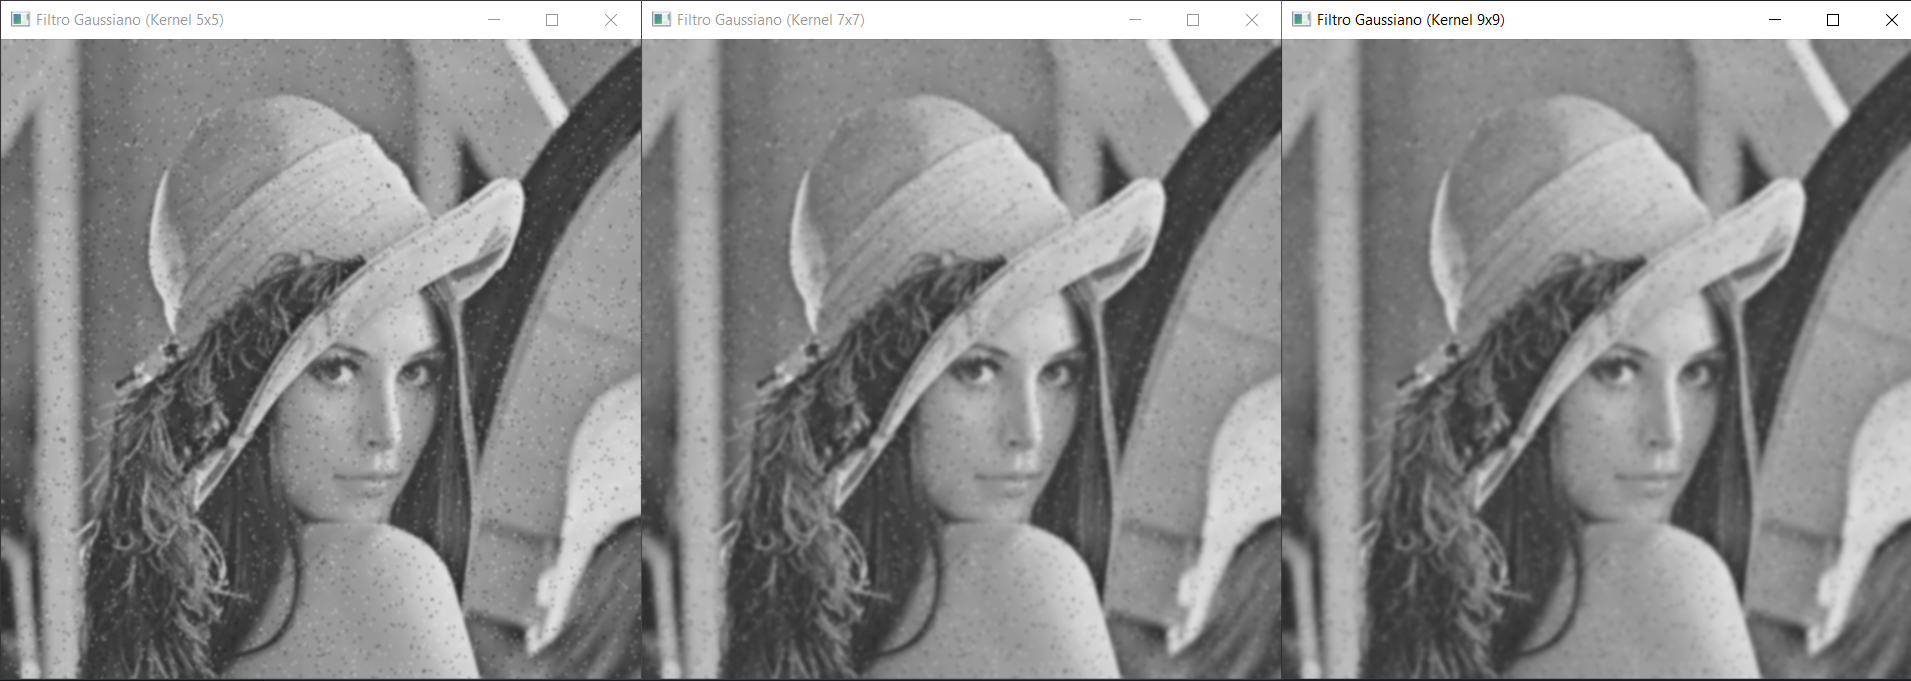